In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.tree import export_graphviz
import graphviz
import io


In [2]:
# 1. Data Preparation
# Loading the dataset
df = pd.read_excel('C:/Users/victus/Data_Science/New folder/Decision Tree/heart_disease.xlsx', sheet_name='Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [3]:
# Converting boolean and string values to appropriate formats
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['fbs'] = df['fbs'].replace({'TRUE': 1, 'FALSE': 0, 'TURE': 1, True: 1, False: 0})
df['exang'] = df['exang'].replace({'TRUE': 1, 'FALSE': 0, 'TURE': 1, 'FALSE': 0, True: 1, False: 0})


C:\Users\victus\AppData\Local\Temp\ipykernel_6328\1395584730.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fbs'] = df['fbs'].replace({'TRUE': 1, 'FALSE': 0, 'TURE': 1, True: 1, False: 0})
C:\Users\victus\AppData\Local\Temp\ipykernel_6328\1395584730.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].replace({'TRUE': 1, 'FALSE': 0, 'TURE': 1, 'FALSE': 0, True: 1, False: 0})


In [4]:
# Handling missing or zero values in 'chol' by replacing with median
df['chol'] = df['chol'].replace(0, df['chol'][df['chol'] != 0].median())

In [5]:
# 2. Exploratory Data Analysis (EDA)
# Checking for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


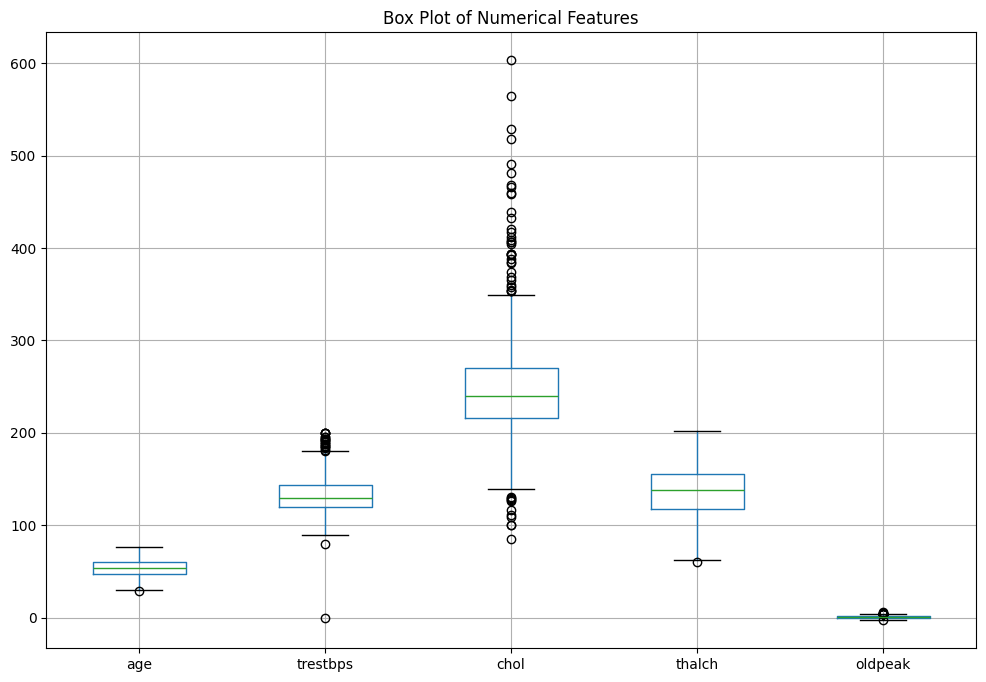

In [6]:
# Checking for outliers using box plots
plt.figure(figsize=(12, 8))
df.boxplot(column=['age', 'trestbps', 'chol', 'thalch', 'oldpeak'])
plt.title('Box Plot of Numerical Features')
plt.savefig('box_plot.png')
plt.show()

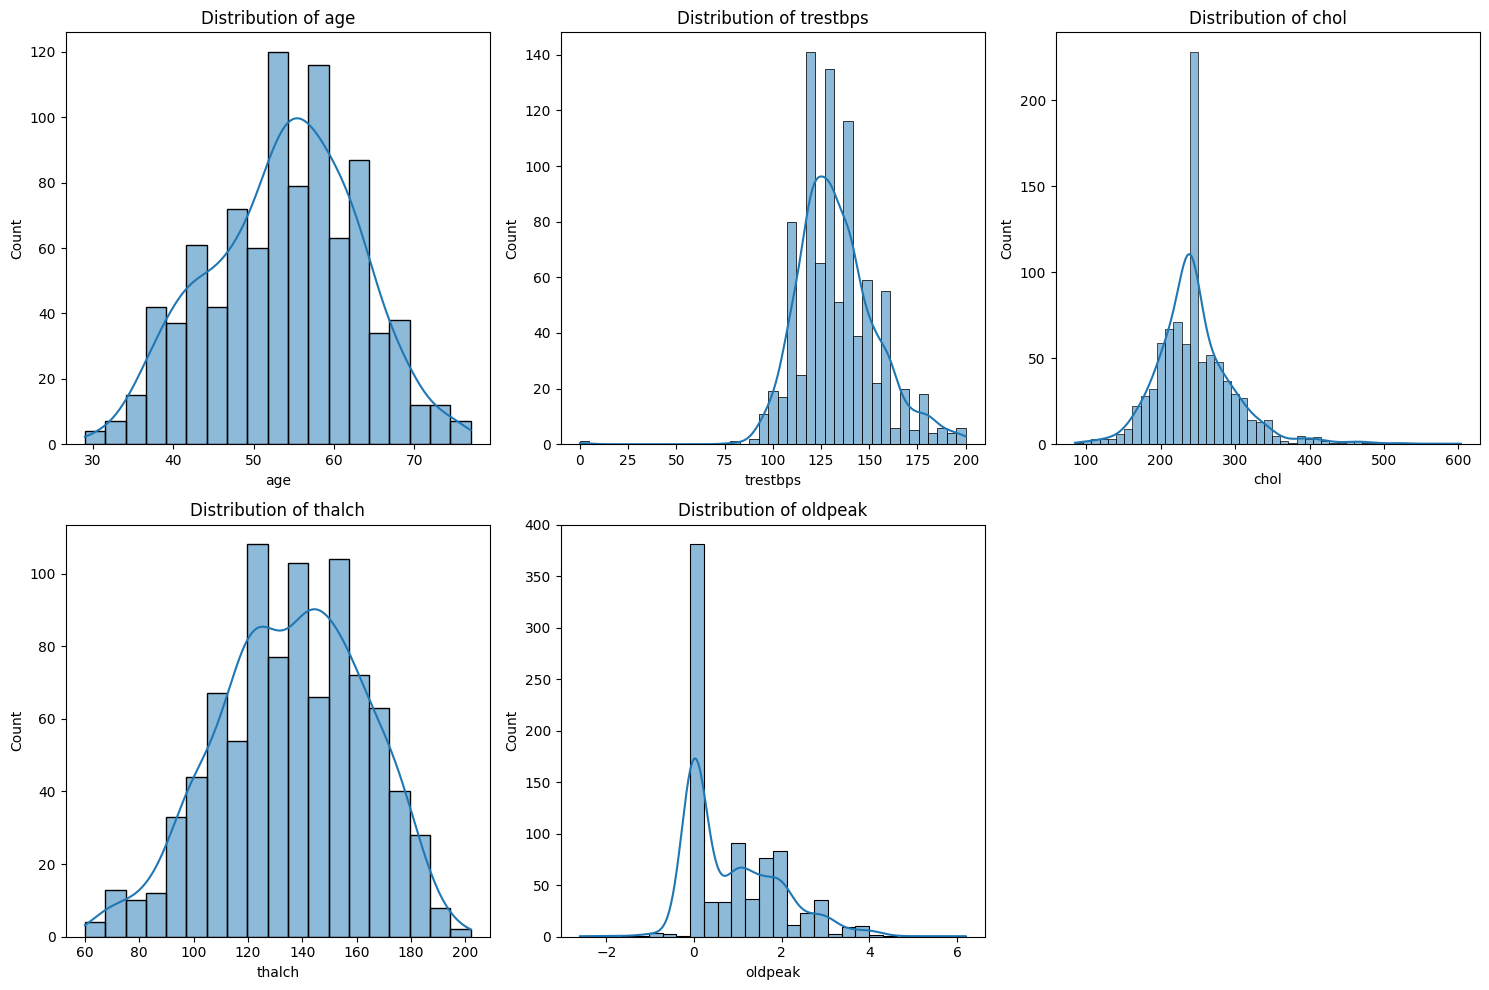

In [7]:
# Visualizing feature distributions
plt.figure(figsize=(15, 10))
for i, column in enumerate(['age', 'trestbps', 'chol', 'thalch', 'oldpeak']):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.savefig('histograms.png')
plt.show()


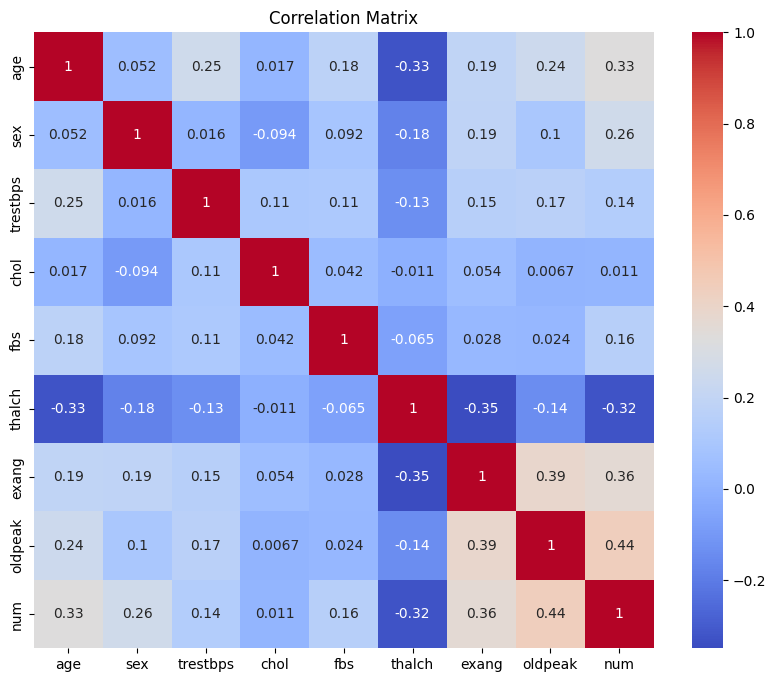

In [8]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

In [9]:
# 3. Feature Engineering
# Encoding categorical variables
le = LabelEncoder()
categorical_cols = ['cp', 'restecg', 'slope', 'thal']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [10]:
# Defining features and target
X = df.drop('num', axis=1)
y = df['num'].apply(lambda x: 1 if x > 0 else 0)  # Binary classification: 0 (no disease) vs 1 (disease)


In [11]:
# Scaling numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [12]:
# 4. Decision Tree Classification
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Training the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [14]:
# Evaluating the model
y_pred = dt.predict(X_test)
print("Initial Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]):.4f}")

Initial Model Performance:
Accuracy: 0.7253
Precision: 0.7363
Recall: 0.7204
F1-Score: 0.7283
ROC-AUC: 0.7254


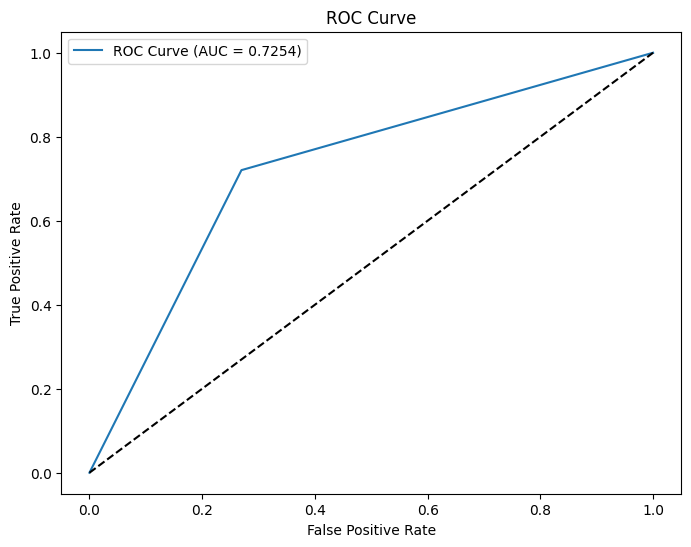

In [15]:
# Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('roc_curve.png')
plt.show()


In [16]:
# 5. Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [17]:
# Best model evaluation
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)
print("\nBest Model Performance after Hyperparameter Tuning:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, best_dt.predict_proba(X_test)[:, 1]):.4f}")


Best Model Performance after Hyperparameter Tuning:
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Accuracy: 0.7857
Precision: 0.8068
Recall: 0.7634
F1-Score: 0.7845
ROC-AUC: 0.8222


In [18]:
# 6. Visualizing the Decision Tree
dot_data = io.StringIO()
export_graphviz(best_dt, out_file=dot_data, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
graph = graphviz.Source(dot_data.getvalue())
graph.render('decision_tree', format='png', cleanup=True)
graph.view()

'decision_tree.pdf'